In [3]:
install.packages('caTools')
install.packages('Metrics')
library(caTools)
library(Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
data <- head(pressure)
head(data)

,temperature,pressure
,<dbl>,<dbl>
1,0,0.0002
2,20,0.0012
3,40,0.0060
4,60,0.0300
5,80,0.0900
6,100,0.2700


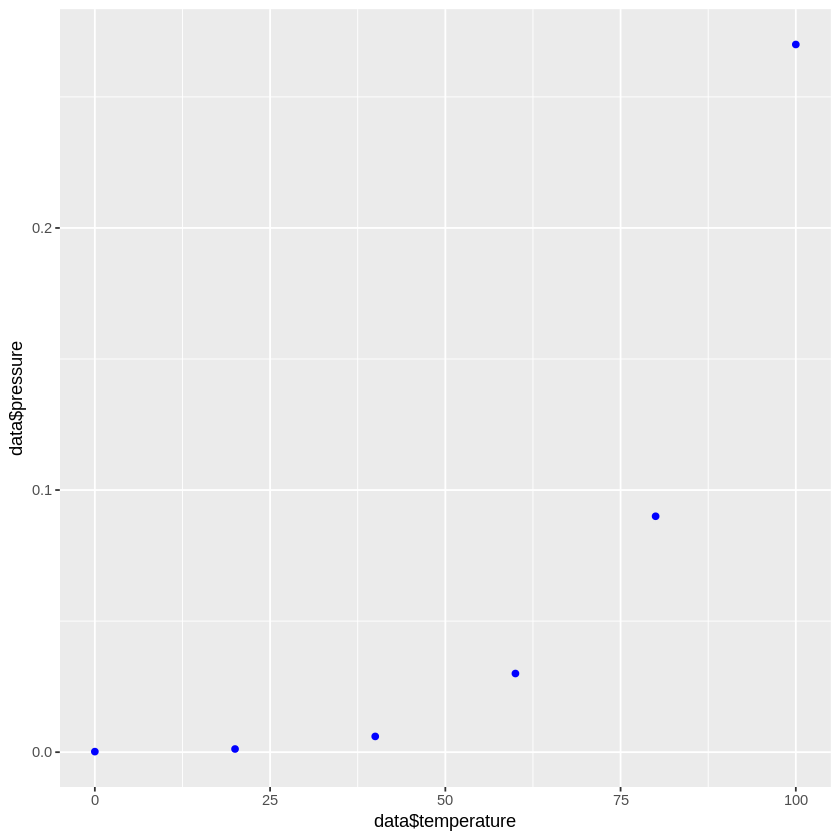

In [8]:
# plotting the graph
library(ggplot2)
ggplot() +
  geom_point(aes(x = data$temperature, y = data$pressure),
             colour = 'blue')

In [9]:
split = sample.split(data$pressure, SplitRatio = 2/3)
training = subset(data, split == TRUE)
testing = subset(data, split == FALSE)

In [10]:
data$temperature2= data$temperature ^  2
data$temperature3= data$temperature ^  3
data$temperature4 = data$temperature  ^  4

In [11]:
polynomial_reg = lm(formula = pressure~ .,data = data)
summary(polynomial_reg)


Call:
lm(formula = pressure ~ ., data = data)

Residuals:
         1          2          3          4          5          6 
-0.0002611  0.0013056 -0.0026111  0.0026111 -0.0013056  0.0002611 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)   4.611e-04  4.137e-03   0.111    0.929
temperature  -6.762e-04  7.627e-04  -0.887    0.538
temperature2  4.993e-05  3.643e-05   1.371    0.401
temperature3 -1.056e-06  5.748e-07  -1.837    0.317
temperature4  8.932e-09  2.856e-09   3.128    0.197

Residual standard error: 0.004145 on 1 degrees of freedom
Multiple R-squared:  0.9997,	Adjusted R-squared:  0.9985 
F-statistic:   809 on 4 and 1 DF,  p-value: 0.02636


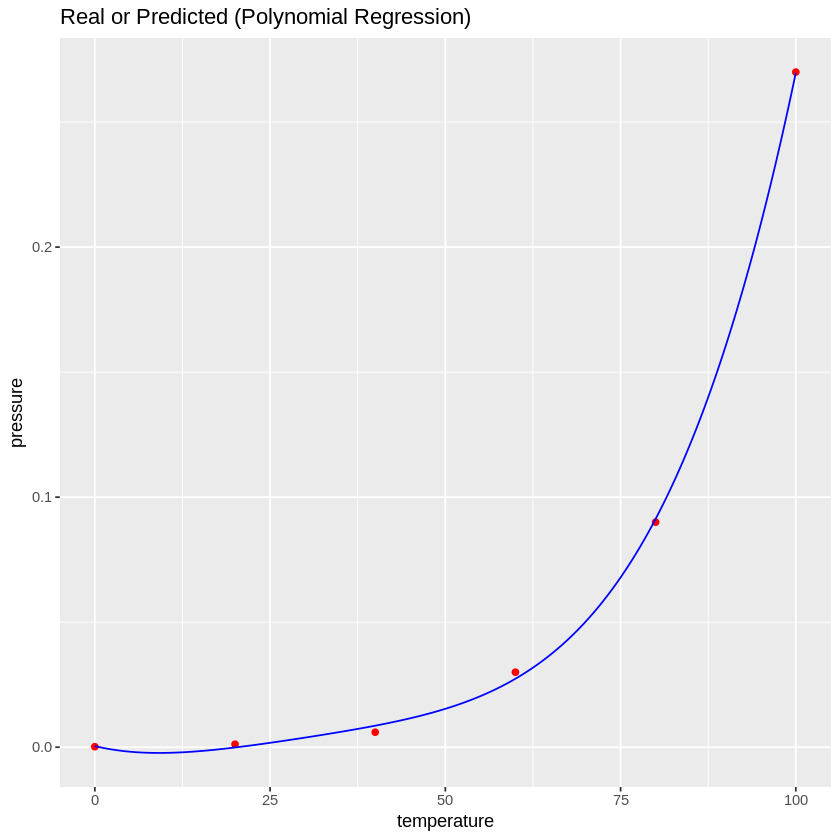

In [12]:
library(ggplot2)
x_grid = seq(min(data$temperature), max(data$temperature), 0.1)
ggplot() +
  geom_point(aes(x = data$temperature, y = data$pressure),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(polynomial_reg,
                                        newdata = data.frame(temperature = x_grid,
                                                             temperature2 = x_grid^2,
                                                             temperature3 = x_grid^3,
                                                             temperature4 = x_grid^4))),
            colour = 'blue') +
  ggtitle('Real or Predicted (Polynomial Regression)') +
  xlab('temperature') +
  ylab('pressure')

In [14]:
# Making prediction on the test data
poly_pred <- predict(object = polynomial_reg)

RMSE<- rmse(poly_pred, testing$pressure)
RMSE

MAE<-mae(poly_pred, testing$pressure)
MAE

[1] 0.09278988

[1] 0.07098519